In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Load the dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [3]:
# Map target labels to their original names
df['target_name'] = df['target'].map(lambda x: wine.target_names[x])

In [4]:
# --- Label Encoding ---
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['target_name'])

In [5]:
# --- One-Hot Encoding ---
one_hot_encoded = pd.get_dummies(df['target_name'], prefix='class')
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [6]:
# --- Print Encoded Data ---
print("\nOriginal Target Column:\n", df['target_name'].head())
print("\nLabel Encoded:\n", df['label_encoded'].head())
print("\nOne Hot Encoded:\n", one_hot_encoded.head())


Original Target Column:
 0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: target_name, dtype: object

Label Encoded:
 0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

One Hot Encoded:
    class_class_0  class_class_1  class_class_2
0           True          False          False
1           True          False          False
2           True          False          False
3           True          False          False
4           True          False          False


In [7]:
# --- Visualization ---

/tmp/ipython-input-8-3659817058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_name', data=df, palette='Set2')


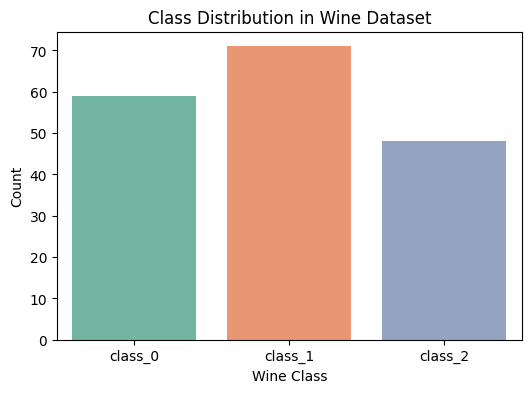

In [8]:
# 1. Target class count
plt.figure(figsize=(6, 4))
sns.countplot(x='target_name', data=df, palette='Set2')
plt.title('Class Distribution in Wine Dataset')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

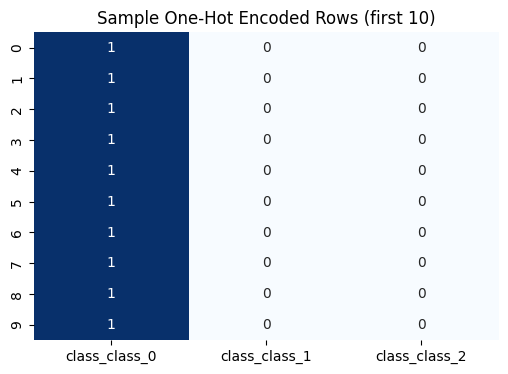

In [9]:
# 2. Heatmap of One-Hot Encoded Labels
plt.figure(figsize=(6, 4))
sns.heatmap(one_hot_encoded.head(10), annot=True, cmap='Blues', cbar=False)
plt.title("Sample One-Hot Encoded Rows (first 10)")
plt.show()